In [1]:
from fastai.vision import *

In [2]:
path = Path('rubbish-classfication/dataset-resized/')

In [3]:
path.ls()

[PosixPath('rubbish-classfication/dataset-resized/cardboard'),
 PosixPath('rubbish-classfication/dataset-resized/models'),
 PosixPath('rubbish-classfication/dataset-resized/glass'),
 PosixPath('rubbish-classfication/dataset-resized/trash'),
 PosixPath('rubbish-classfication/dataset-resized/metal'),
 PosixPath('rubbish-classfication/dataset-resized/plastic'),
 PosixPath('rubbish-classfication/dataset-resized/paper')]

In [4]:
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [5]:
np.random.seed(42)

In [6]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

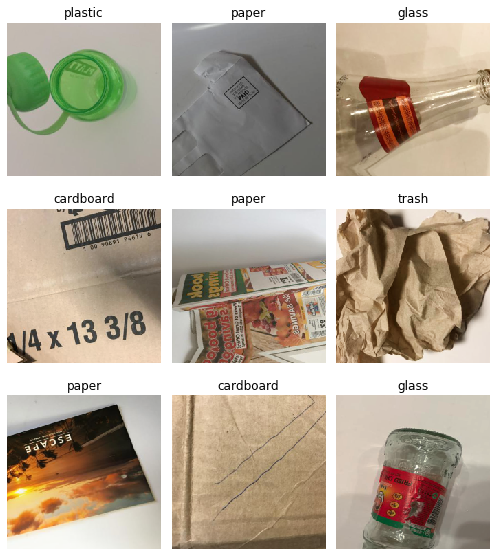

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash'], 6, 2022, 505)

### Train model

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [26]:
# learn.destroy() 
torch.cuda.empty_cache() 

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


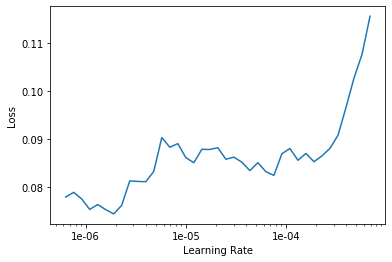

In [16]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 196.00 MiB (GPU 0; 3.95 GiB total capacity; 2.65 GiB already allocated; 125.25 MiB free; 210.19 MiB cached)

In [13]:
learn.save('stage-2')

In [17]:
learn.load('stage-2');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

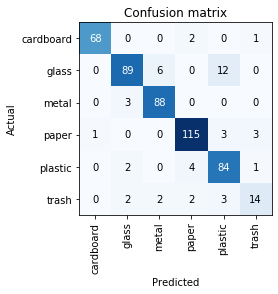

In [19]:
interp.plot_confusion_matrix()

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 0; 3.95 GiB total capacity; 2.92 GiB already allocated; 40.56 MiB free; 24.24 MiB cached)